In [1]:
import numpy as np #numpy dipake kalau di program ada kebutuhan array
import pandas as pd #pandas dipake kalau di program ada kebutuhan nampilin data frame
from sklearn.preprocessing import LabelEncoder #buat encode label yang dpilih jadi nilai int
import nltk #natural language toolkit dipakai kalau diprogram ada kebutuhan manipulasi atau edit kata-kata
from nltk.corpus import stopwords #untuk mendapatkan list stopwords yang terdaftar pada library nltk.corpus
import sklearn #scikit learn dipakai kalau mau melakukan ml di program
from sklearn.feature_extraction.text import TfidfVectorizer #tf-idf vectorizer ini dipakai untuk merubah kata pada data menjadi numerik agar bisa dibaca komputer
from sklearn import metrics #modul yang menilai prediksi error, intinya kalau mau make ml di program setidaknya pakai metrics, disini prediksi errornya pakai roc auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import time
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import SparsePCA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import classification_report
import joblib

In [2]:
data = pd.read_excel('data_training.xlsx')

In [3]:
data.head()

,Nama,Judul,Subject
0,"GALEH WICAKSONO, 1517031083",APLIKASI METODE DEKOMPOSISI ADOMIAN PADA PENYE...,ilmu pengetahuan alam dan matematika
1,"Lolyta Mutiara Putri, 1817021045",GAMBARAN KERUSAKAN HISTOPATOLOGI JANTUNG PADA ...,ilmu pengetahuan alam dan matematika
2,"M Irfan Pratama, 1817041035","PENGARUH VARIASI UKURAN BUTIR, KOMPOSISI SLAG ...",ilmu pengetahuan alam dan matematika
3,"NABILA CITRA RAMADHANI, 1513054047",Hubungan Pola Asuh Orang Tua dengan Keterampil...,ilmu pengetahuan alam dan matematika
4,"YUGO CHAMBIOSO, 1817041058",PENGARUH VARIASI KOMPOSISI BENTONIT DAN ABU CA...,ilmu pengetahuan alam dan matematika


In [4]:
print (len(data['Judul']))

1707


In [5]:
data.loc[173]

Nama                           ORICHA MUTIA RANI, 1517041045
Judul      PENGARUH INHIBITOR EKSTRAK DAUN INAI (Lawsonia...
Subject                 ilmu pengetahuan alam dan matematika
Name: 173, dtype: object

In [6]:
#nunjukin df subject yang unik, karena banyak yang sama 
data['Subject'].unique()

array([' ilmu pengetahuan alam dan matematika',
       'Teknologi (ilmu terapan)', 'Agama', 'Bahasa',
       'Filsafat dan psikologi',
       'Ilmu komputer, informasi dan pekerjaan umum', 'Ilmu sosial',
       'Sejarah dan Geografi', 'Seni, seni rupa, kesenian'], dtype=object)

In [7]:
#le = LabelEncoder()#manggil fungsinya
#le.fit(list(data['Subject'].values))#ngambil value kolom subject 
#data['Subject'] = le.transform(list(data['Subject']))#ngerubah isi kolom subject ke int

In [8]:
#data['Subject'].unique()

In [9]:
#data['Subject'].value_counts()

In [10]:
j=data['Judul'].apply(lambda i:i.lower())

In [11]:
j.loc[0]

'aplikasi metode dekomposisi adomian pada penyelesaian sistem persamaan diferensial parsial linier homogen orde 1.'

In [12]:
stop = list(stopwords.words('indonesian'))
stop[:5]
#print(stop)

['ada', 'adalah', 'adanya', 'adapun', 'agak']

In [13]:
def rubah(j):
    split = j.split()
    a = ' '.join([word for word in split if (word  not in stop)&(word.isalpha())])
    return a

In [14]:
t = j.apply(rubah)
#print(type(t))
t.loc[0]

'aplikasi metode dekomposisi adomian penyelesaian sistem persamaan diferensial parsial linier homogen orde'

In [15]:
#df=pd.DataFrame(t)
#print(df)
#df.to_csv(r'C:\t.csv')
print(t)

0       aplikasi metode dekomposisi adomian penyelesai...
1       gambaran kerusakan histopatologi jantung menci...
2       pengaruh variasi ukuran komposisi slag subtitu...
3       hubungan pola asuh orang tua keterampilan sosi...
4       pengaruh variasi komposisi bentonit abu sawit ...
                              ...                        
1702    pembelajaran seni budaya project based learnin...
1703    pembelajaran tatap muka terbatas pelajaran sen...
1704    pengaruh latihan skipping latihan box daya led...
1705    pelestarian tari tupping desa kuripan penengah...
1706    penggunaan video tutorial pembelajaran tari be...
Name: Judul, Length: 1707, dtype: object


In [16]:
le = LabelEncoder()
le.fit(list(data['Subject'].values)) 
data['Subject'] = le.transform(list(data['Subject']))

In [17]:
print(type(data['Subject']))

<class 'pandas.core.series.Series'>


In [18]:
data['Subject'].unique()

array([0, 8, 1, 2, 3, 4, 5, 6, 7])

In [19]:
data['Subject'].value_counts()

5    424
8    416
4    310
0    240
2    117
6     96
3     70
7     22
1     12
Name: Subject, dtype: int64

In [20]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(t)
#print(vectorizer.vocabulary_)
#vectors.shape

In [21]:
#print(vectors)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(vectors, data['Subject'], test_size=0.2)

In [23]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1365, 4724) (1365,) (342, 4724) (342,)


In [24]:
#data.info()

In [25]:
#print(X_train)

In [26]:
pd.DataFrame(vectors.toarray(),columns=vectorizer.get_feature_names_out(),index=data['Subject'])

,abat,abdul,ability,abnormal,about,abri,absorbing,abstrak,abu,abung,...,zink,zola,zollingeriana,zona,zonasi,zs,zulfa,émile,الكلام,مهارة
Subject,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.389428,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.387041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#df.to_csv(r'C:\contoh.csv')

In [59]:
#df=pd.DataFrame(vectors)
#print(df)
#df.to_csv(r'C:\contoh1.csv')

                                                      0
0       (0, 2825)\t0.332433500397812\n  (0, 1474)\t0...
1       (0, 1971)\t0.3254428307693544\n  (0, 803)\t0...
2       (0, 4280)\t0.2883024163319867\n  (0, 2146)\t...
3       (0, 4563)\t0.3766219591822799\n  (0, 140)\t0...
4       (0, 2634)\t0.44021386077525876\n  (0, 3014)\...
...                                                 ...
1702    (0, 9)\t0.3870407444710074\n  (0, 1683)\t0.3...
1703    (0, 4317)\t0.4064971673265335\n  (0, 4030)\t...
1704    (0, 4489)\t0.3147827603692997\n  (0, 2843)\t...
1705    (0, 2160)\t0.4560725121916626\n  (0, 4492)\t...
1706    (0, 4496)\t0.40960604119942645\n  (0, 381)\t...

[1707 rows x 1 columns]


In [55]:
transformer = SparsePCA(n_components=2, random_state=0)

In [56]:
transformer.fit(X_train.toarray())

SparsePCA(n_components=2, random_state=0)

In [57]:
X_transformed = transformer.transform(X_train.toarray())
X_transformed.shape

(1365, 2)

In [58]:
X_transformed

array([[-0.02495072, -0.01946765],
       [-0.02495072, -0.01946765],
       [-0.02495072, -0.01946765],
       ...,
       [-0.02495072, -0.01946765],
       [ 0.06476889, -0.01946765],
       [-0.02495072, -0.01946765]])

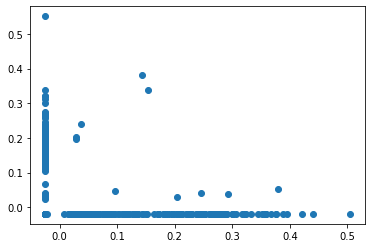

In [59]:
plt.scatter(X_transformed[:, 0],X_transformed[:, 1])

In [60]:
df = pd.DataFrame(X_transformed,columns=['X','Y'])
df['Subject']=y_train

In [61]:
df['Subject'].fillna(0, inplace=True)

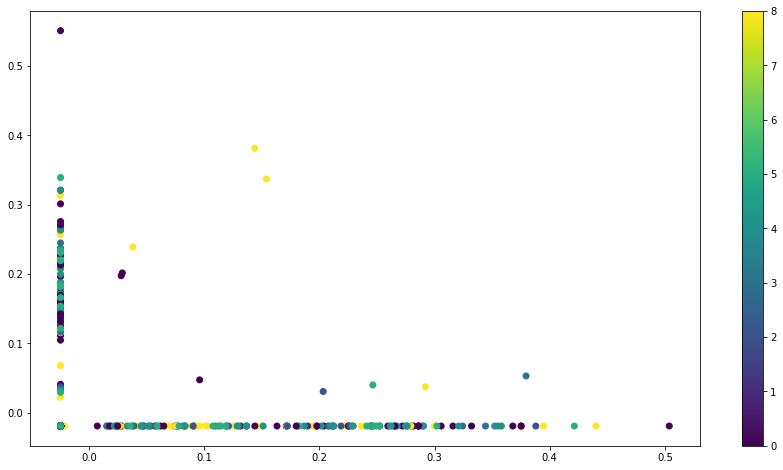

In [62]:
fig = plt.figure(figsize=(15,8))
#plt.axes(projection ='3d')
plt.scatter(df['X'], df['Y'], c=df['Subject'])
plt.colorbar()
plt.show()

# SVM

In [31]:
svm=SVC(kernel='rbf',gamma='scale',max_iter=1500, tol=1e-4)
start = time.time()
svm.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
pred = svm.predict(X_test)
#print (metrics.accuracy_score(y_test, pred))
#print (metrics.precision_score(y_test, pred, average='macro'))
#print (metrics.recall_score(y_test, pred, average='macro'))
#print(svm.score)

Training time: 0.5246255397796631s


In [33]:
def plot_learning_curves(estimator, X, y, cv):
        train_sizes, train_scores, test_scores = learning_curve(
            estimator=estimator,
            X=X,
            y=y,
            train_sizes=np.linspace(0.1, 1.0, 5),
            cv=cv,
            scoring="accuracy",
            random_state=42)
        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        
        fig = go.Figure()
        
        fig.add_trace(
        go.Scatter(
            x=train_sizes,
            y=train_mean,
            name="Training Score",
            mode="lines",
            line=dict(color="blue"),
            )
        )
        
        fig.add_trace(
        go.Scatter(
            x=train_sizes,
            y=test_mean,
            name="Validation Score",
            mode="lines",
            line=dict(color="green"),
            )
        )
        
        fig.update_layout(
        title="Learning Curves",
        xaxis_title="Number of epoch",
        yaxis_title="Accuracy",
        )

        fig.show()

In [34]:
plot_learning_curves(svm, X_train, y_train, cv=5)

In [27]:
confusion_matrix(y_test, pred)

array([[20,  0,  0,  0,  2,  0,  0,  0, 18],
       [ 0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  4,  0,  0,  0],
       [ 2,  0,  3,  0, 30, 17,  0,  0, 25],
       [ 1,  0,  0,  0,  1, 74,  0,  0,  3],
       [ 1,  0,  1,  0,  0,  8,  4,  0,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1],
       [ 0,  0,  0,  0,  4, 11,  0,  0, 71]], dtype=int64)

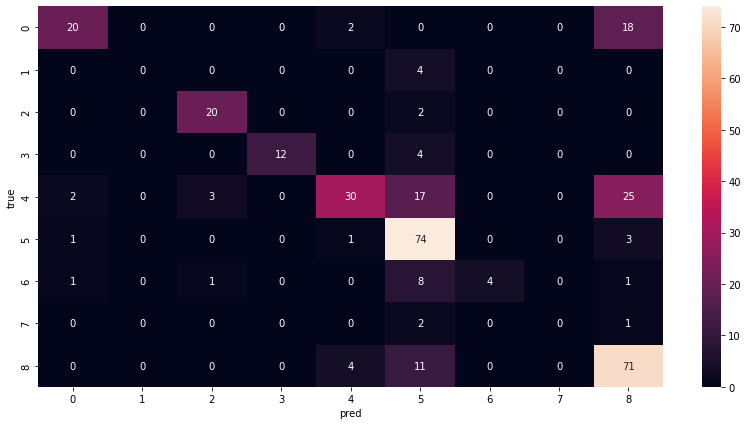

In [28]:
fig = plt.subplots(figsize=(14,7))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="g")
plt.xlabel("pred")
plt.ylabel("true")
plt.show()

In [29]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        40
           1       0.00      0.00      0.00         4
           2       0.83      0.91      0.87        22
           3       1.00      0.75      0.86        16
           4       0.81      0.39      0.53        77
           5       0.61      0.94      0.74        79
           6       1.00      0.27      0.42        15
           7       0.00      0.00      0.00         3
           8       0.60      0.83      0.69        86

    accuracy                           0.68       342
   macro avg       0.63      0.51      0.53       342
weighted avg       0.71      0.68      0.65       342



c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Test Model

In [30]:
text = ['PERUNDUNGAN DIGITAL PADA ANAK SEKOLAH DASAR']
text[0] = text[0].lower()
test = (vectorizer.transform(text))
d = (svm.predict(test))
x=le.inverse_transform(d)
print(x)

['Ilmu sosial']


# Save Model


In [39]:
joblib.dump(svm, 'svm.pkl')
print ("Model saved")

Model saved


In [41]:
loaded_model = joblib.load('svm.pkl')
result = loaded_model.score(X_test, y_test)
print (result)

0.695906432748538
